In [24]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# df = pd.read_csv("WeAudit_Survey_Responses.csv", index_col=0)

In [25]:
df = pd.read_excel("WeAudit_Survey_Responses.xlsx", index_col=0)
df.drop(index=df.index[0], axis=0, inplace=True)
# df.tail(10)


In [26]:
#JUST RUN THIS CODE ONCE!
# drop unreliable data and worthless columns
row_count= len(df)
print(row_count)
df = df[df.Q1 != 9]
df = df.drop(df.iloc[:,0:15], axis=1) 
df = df.drop(df.iloc[:,1:11], axis=1) 
row_count_updated= len(df)
print(row_count_updated)

df.head(10)

2181
2181


,UserLanguage,Q1 (gender),Q2.1(gender),Q2.2(gender),Q2.3(gender),Q2.4(gender),Q2.5(gender),Q2.6(gender),Q2.7(gender),Q3 (gender),Q1 (sexuality),Q2.1 (sexuality),Q2.2 (sexuality),Q2.3 (sexuality),Q2.4 (sexuality),Q2.5 (sexuality),Q2.6 (sexuality),Q2.7 (sexuality),Q3 (sexuality),Q1 (race),Q2.1 (race),Q2.2 (race),Q2.3 (race),Q2.4 (race),Q2.5 (race),Q2.6 (race),Q2.7 (race),Q3 (race),Q1 (neutral),Q2.1 (neutral),Q2.2 (neutral),Q2.3 (neutral),Q2.4 (neutral),Q2.5 (neutral),Q2.6 (neutral),Q2.7 (neutral),Q3 (neutral),Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3,Q3_21_TEXT,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q1,Q1.1,Q2,Q2_22_TEXT,Q3.1,Q4.1,Q4.2,Q4_9_TEXT,Q5.1,Q6.1,Q7_First Click,Q7_Last Click,Q7_Page Submit,Q7_Click Count,Debriefing (race),Debriefing (race)_3_TEXT,D Question (gender),D Question (gender)_3_TEXT,Debriefing (sexual),Debriefing (sexual)_3_TEXT,Q12,PROLIFIC_ID,eg of race,text race,debriefing race,eg of gender,text gender,debriefing gender,eg of sexual orientation,text sexuality,debriefing sexuality,eg of neutral case,text neutral
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,EN,Totally unharmful,NaN,NaN,NaN,NaN,NaN,NaN,I believe this is totally unharmful because there are doctors here and that's what was searched.,NaN,Totally unharmful,NaN,NaN,NaN,NaN,NaN,NaN,I believe this search is totally unharmful because the results are quite literally romantic couples. Nothing nefarious.,NaN,Totally unharmful,NaN,NaN,NaN,NaN,NaN,NaN,"I believe it's totally unharmful because it's just babies. Type in black, asian, etc baby if that's what you are looking for.",NaN,Totally unharmful,NaN,NaN,NaN,NaN,NaN,NaN,I believe there's no bias or discrimination here because these are literally flowers.,NaN,A few times a year,A few times a year,A few times a year,Never,Less than once a year,"Your Height,Some other Aspect of Your Physical Appearance",NaN,Yes,Yes,Yes,Monthly,A few times a year,Extremely familiar,Very aware,9,25-34,White,NaN,Male,No,Homosexual,NaN,Bachelor’s degree,27288,0.673,11.864,14.597,7,Yes,NaN,No,NaN,No,NaN,no,NaN,"<img src=""https://cmu.yul1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_1QXszWwVduvpZNY"" alt=""baby"">","These are the search results for ""baby"" from an image search system. It was captured from a computer screen.",The following case (we showed your previously in this survey) has been identified as having harmful algorithmic bias and discrimination against racial minorities.,"<img src=""https://cmu.yul1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_0e9vINLOnZXTvDM"" alt=""doctors"">","These are the search results for ""doctor"" from an image search system. It was captured from a computer screen.",The following case (we showed your previously in this survey) has been identified as having harmful algorithmic bias and discrimination against non-male gender identities and racial minorities.,"<img src=""https://cmu.yul1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_a5h4LrVw6vxYRvg"" alt=""romantic couples"">","These are the search results for ""romantic couples"" from an image search system. It was captured from a phone screen.",The following case (we showed your previously in this survey) has been identified as having harmful algorithmic bias and discrimination against sexual orientation minorities.,"<img src=""https://cmu.yul1.qualtrics.com/ControlPanel/Graphic.php?IM=IM_9sPNY6dLY98i5fM"" alt=""flowers"">","These are the search results for ""flowers"" from an image search system. It was captured from a computer screen."
2,EN,Neither harmful nor unharmful,NaN,NaN,NaN,"I believe it is neither harmful nor unharmful because it depicts more white men, though there are minorities as well.",NaN,NaN,NaN,NaN,Totally unharmful,NaN,NaN,NaN,NaN,NaN,NaN,I think it is totally unharmful because there is no bias. It's showing a wide range of people and in my opinion there is no discrimination.,NaN,Totally harmful,I believe it is totally harmful because it is only showing white babies. That is the definition of discrimination.

In [20]:
display(df['UserLanguage'].value_counts(normalize=True) * 100)
# all speak english
display(df['Q2'].value_counts(normalize=True) * 100)

display(df['Q3.1'].value_counts(normalize=True) * 100)

UserLanguage
EN    100.0
Name: proportion, dtype: float64

Q2
White                                                                                                                           60.302891
Black or African American                                                                                                       12.987609
Asian                                                                                                                           10.371730
Hispanic                                                                                                                         6.516751
White,Hispanic                                                                                                                   2.294631
White,Asian                                                                                                                      1.376778
Two or More Races                                                                                                                1.284993
White,Black or African American

Q3.1
Male                                 51.950436
Female                               44.469940
Genderqueer/Gender Non Conforming     1.881597
Trans Male/Trans Man                  0.642497
Rather not say                        0.504819
Trans Female/Trans Woman              0.321248
Different Identity                    0.229463
Name: proportion, dtype: float64

In [21]:
## ignore this cell, this cell is for analysing the distribution of race
# import seaborn as sns
# import matplotlib.pyplot as plt

# race_df_test = df[['Q2']].copy()

# race_df_test = race_df_test.dropna(subset=['Q2'])

# race_df_test['Q2_clean'] = race_df_test['Q2'].apply(lambda x: "Two or More Races" if ',' in x else x)


# top_5_races = race_df_test['Q2_clean'].value_counts().nlargest(5).index
# df_top_5 = race_df[race_df_test['Q2_clean'].isin(top_5_races)]

# plt.figure(figsize=(8, 6))
# ax = sns.countplot(data=df_top_5, x='Q2_clean', stat="percent", 
#                   order=top_5_races)



# ax.set_title('Top 5 Most Frequent Races (Percentage)', fontsize=16)
# ax.set_ylabel('Percentage')
# ax.set_xlabel('Race')
# plt.show()





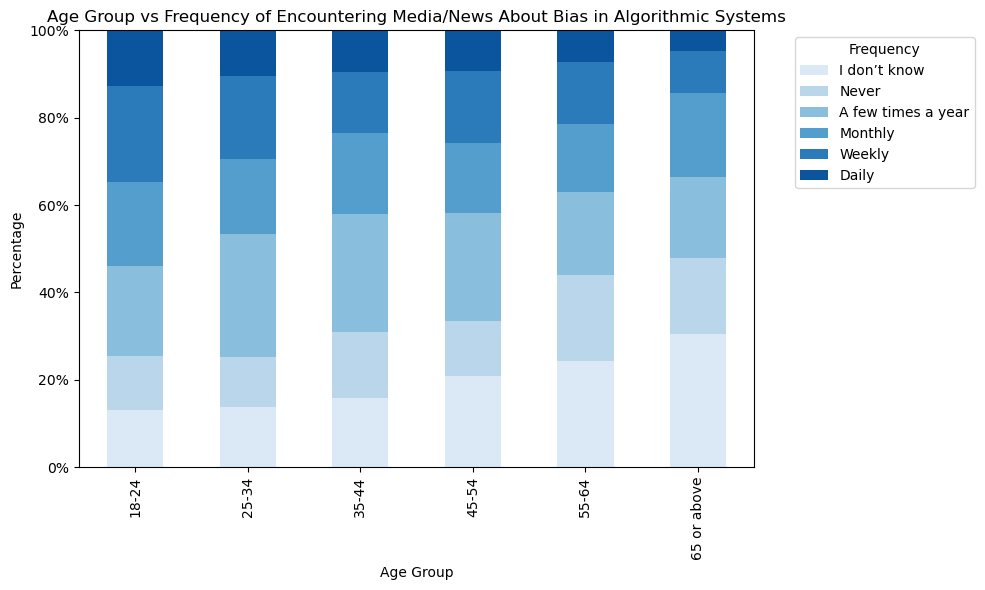

In [44]:
## here i want to map the user's age to their answers to "How frequently do you encounter 
## news/media about bias in algorithmic systems used by people or organizations?"
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
df = df.dropna(subset=['Q8','Q1.1'])
frenquncy_order = [
    "I don’t know",
    "Never",
    "A few times a year",
    "Monthly",
    "Weekly",
    "Daily"  
]
# df['Q8_encoded'] = df['Q8'].replace(encoding_map)

df['age_group'] = df['Q1.1'].str.strip()

df['Q8'] = pd.Categorical(df['Q8'], categories=frenquncy_order, ordered=True)
cross_tab = pd.crosstab(df['age_group'], df['Q8'])

# cross_tab = pd.crosstab(df['age_group'], df['Q8_encoded'])

# visualize the relationship between age and how much they aware of bias in algorithmic systems through news/media?
custom_palette = sns.color_palette("Blues", n_colors=cross_tab.shape[1])
cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)*100
cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_palette)
plt.title("Age Group vs Frequency of Encountering Media/News About Bias in Algorithmic Systems")
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()

# Step 5: Chi-Square Test to examine the association
# chi2, p, dof, ex = chi2_contingency(cross_tab)
# print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

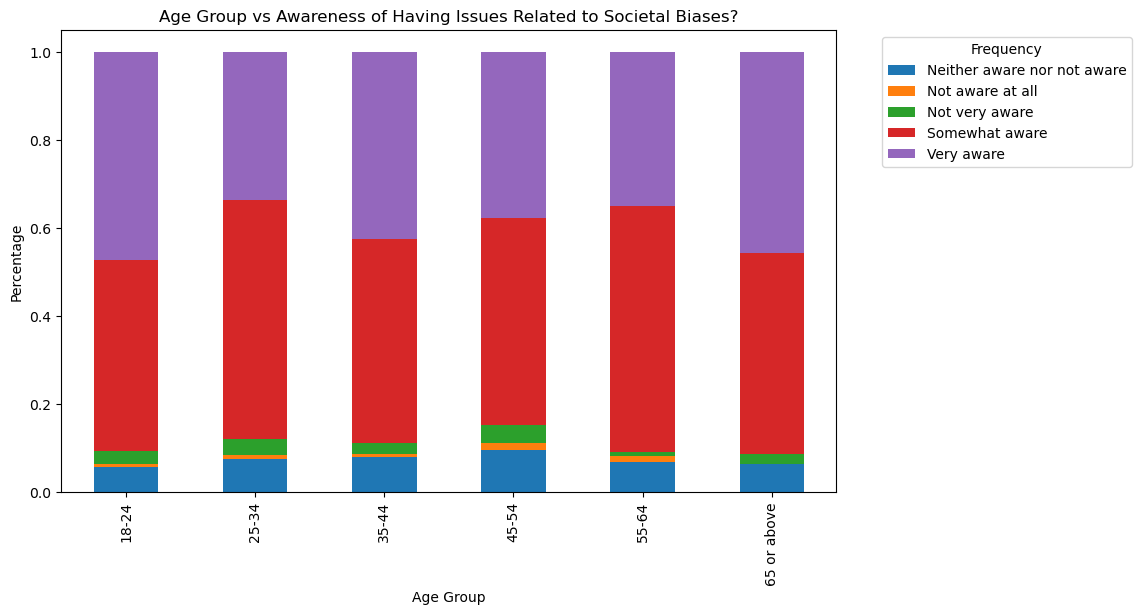

Chi-Square Statistic: 36.999695342240294, p-value: 0.011703016550473407


In [33]:
## here i want to map the user's age to their answers to "How aware do you feel you are with issues related to societal biases 
##(e.g., racial biases, gender biases)?"

from scipy.stats import chi2_contingency

df = df.dropna(subset=['Q10'])
# encoding_map = {
#     "Very aware": 5,
#     "Somewhat aware": 4,
#     "Neither aware nor not aware": 3,
#     "Not very aware": 2,
#     "Not aware at all": 1 
# }

# df['Q10_encoded'] = df['Q10'].replace(encoding_map)



# cross_tab = pd.crosstab(df['age_group'], df['Q10_encoded'])
cross_tab = pd.crosstab(df['age_group'], df['Q10'])

# visualize the relationship between age and how much they aware of bias in algorithmic systems through news/media?
cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)  # Normalize by row
cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Age Group vs Awareness of Having Issues Related to Societal Biases?")
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 5: Chi-Square Test to examine the association
chi2, p, dof, ex = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

In [34]:
## combine and process the gender catagories:
## there will only be three catagories: male, female, and non-binary(including Genderqueer/Gender Non Conforming, Trans Male/Trans Man, 
## Trans Female/Trans Woman,Different Identity and drop(ignore) the Rather not say
gender_df = df.copy()
gender_df = gender_df.dropna(subset=['Q3.1'])

gender_map = {
    "Male": "Male",
    "Female": "Female",
    "Genderqueer/Gender Non Conforming": "Non-binary",
    "Trans Male/Trans Man": "Non-binary",
    "Trans Female/Trans Woman": "Non-binary",
    "Different Identity": "Non-binary",
    "Rather not say": None  
}

df['gender_clean'] = df['Q3.1'].replace(gender_map)

df = df.dropna(subset=['gender_clean'])

# print(df['gender_clean'].value_counts())
# df

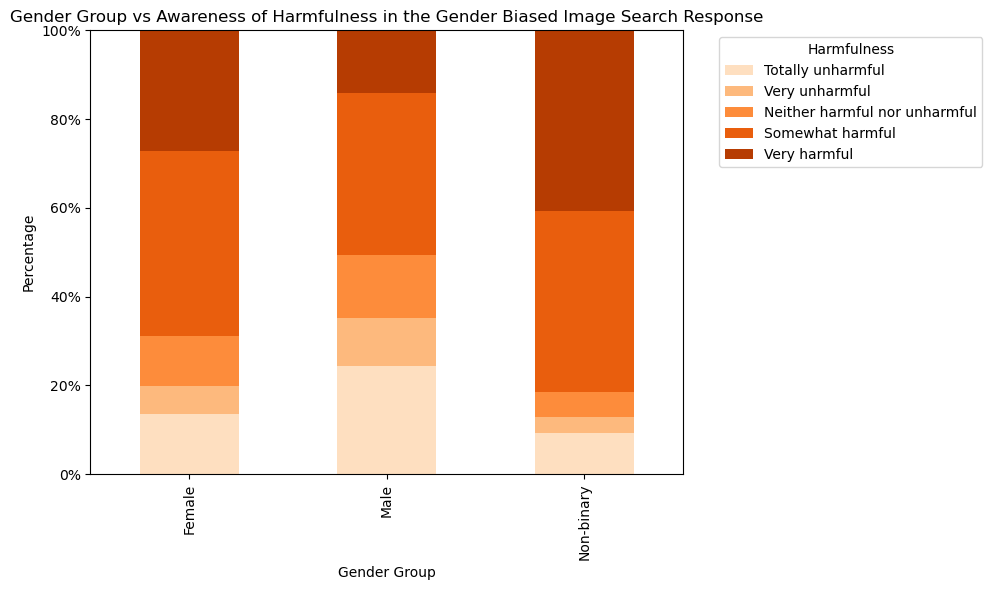

In [43]:
## gender vs. how harmful they feel about gender related questions
import pandas as pd
import matplotlib.pyplot as plt

df = df.dropna(subset=['Q1'])

harmfulness_order = [
    "Totally unharmful",
    "Very unharmful",
    "Neither harmful nor unharmful",
    "Somewhat harmful",
    "Very harmful"
]

df['Q1 (gender)'] = pd.Categorical(df['Q1 (gender)'], categories=harmfulness_order, ordered=True)
colors = ['#FF0000', '#8B0000', 'Magenta','#87CEEB', '#000080']
cross_tab = pd.crosstab(df['gender_clean'], df['Q1 (gender)'])

cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)*100
custom_palette = sns.color_palette("Oranges", n_colors=cross_tab.shape[1])

cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color = custom_palette)

plt.title("Gender Group vs Awareness of Harmfulness in the Gender Biased Image Search Response")
plt.ylabel('Percentage')
plt.xlabel('Gender Group')
plt.legend(title='Harmfulness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()



In [36]:
## here to clean up and preprocess the race catagories: there will only be 8 catagories: White, Asian, Black or African american, Hispanic,
## Two or more races（all of the responeses with two or more races being included here）, Native Hawaiian or Other Pacific Islander, American Indian,
## Other races

race_df = df.copy()
race_df = gender_df.dropna(subset=['Q2'])
df['race_clean'] = race_df['Q2'].apply(lambda x: "Two or More Races" if ',' in x else x)
# df.head(10)

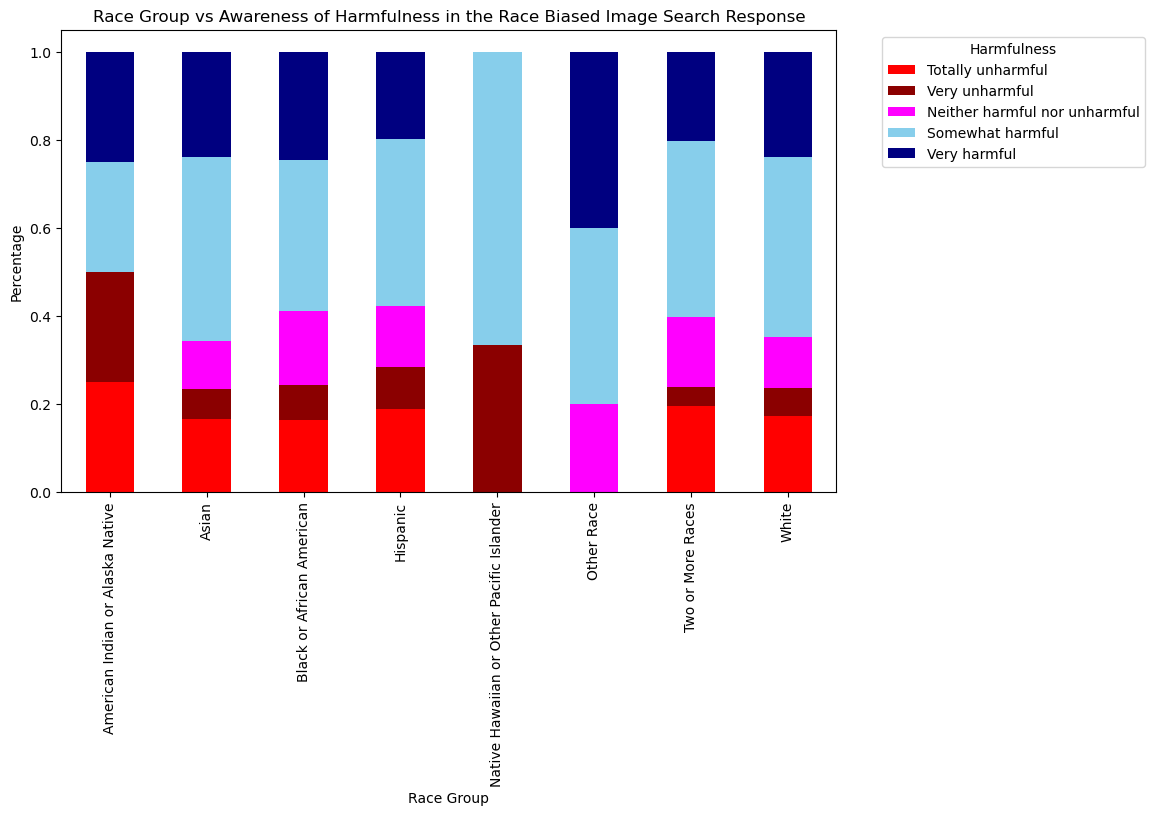

In [37]:
## user's race vs. how harmful they feel about race related questions

df['Q1 (race)'] = pd.Categorical(df['Q1 (race)'], categories=harmfulness_order, ordered=True)
colors = ['#FF0000', '#8B0000', 'Magenta','#87CEEB', '#000080']
cross_tab = pd.crosstab(df['race_clean'], df['Q1 (race)'])

cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)

cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color = colors)

plt.title("Race Group vs Awareness of Harmfulness in the Race Biased Image Search Response")
plt.ylabel('Percentage')
plt.xlabel('Race Group')
plt.legend(title='Harmfulness', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

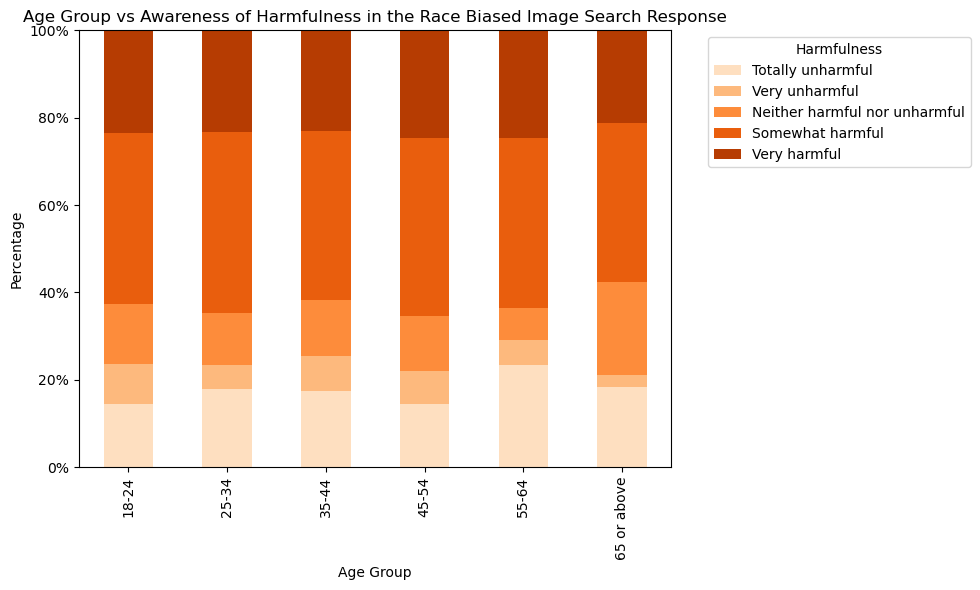

In [41]:
## user's age vs. how harmful they feel about race related questions

df['Q1 (race)'] = pd.Categorical(df['Q1 (race)'], categories=harmfulness_order, ordered=True)
colors = ['#FF0000', '#8B0000', 'Magenta','#87CEEB', '#000080']
cross_tab = pd.crosstab(df['age_group'], df['Q1 (race)'])

cross_tab_norm = cross_tab.div(cross_tab.sum(1), axis=0)* 100

custom_palette = sns.color_palette("Oranges", n_colors=cross_tab.shape[1])

cross_tab_norm.plot(kind='bar', stacked=True, figsize=(10, 6), color = custom_palette)

plt.title("Age Group vs Awareness of Harmfulness in the Race Biased Image Search Response")
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.legend(title='Harmfulness', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()